In [1]:
#Calculate volatility and moving average

import pandas as pd
from matplotlib import pyplot as plt

%matplotlib notebook


In [3]:
data=pd.read_csv("C:/Users/Vartotojas/Desktop/Financial analysis training/AAPL.csv", index_col=0, parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300


In [6]:
# calculate percentage change no1
data["%-chg"] = data["Close"].pct_change()

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200,NaN
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,-0.009103
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700,-0.004240
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100,0.020226
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,0.007513


In [8]:
#calculate percentage change no2
#Close 2 row - close 1 row divides by close 1 row
(141.509995 - 142.809998)/142.809998

-0.00910302512573387

In [9]:
import numpy as np


In [10]:
#calculate percentage change with log data no3 (easier make calculations in bigger analysis)
data["Log returns"] = np.log(data["Close"]/data["Close"].shift())

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200,NaN,NaN
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,-0.009103,-0.009145
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700,-0.004240,-0.004249
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100,0.020226,0.020024
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,0.007513,0.007484


In [12]:
#calculate percentage change with log data without subtraction (shift moves down previous row)
data["Close"]/data["Close"].shift()

Date
2021-10-11         NaN
2021-10-12    0.990897
2021-10-13    0.995760
2021-10-14    1.020226
2021-10-15    1.007513
                ...   
2022-10-04    1.025623
2022-10-05    1.002053
2022-10-06    0.993374
2022-10-07    0.963281
2022-10-10    1.002356
Name: Close, Length: 252, dtype: float64

In [13]:
#standart deviation
data["Log returns"].std()

0.02039043593446017

In [14]:
#volatility standart deviation * square root of 252
volatility = data["Log returns"].std() + 252**.5

In [15]:
volatility

15.894898302322005

In [18]:
# round the result
str_vol = str(round(volatility, 4)*100)
str_vol

'1589.49'

Text(0.5, 1.0, 'AAPL volatility 1589.49%')

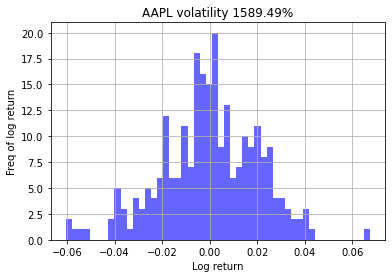

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
data["Log returns"].hist(ax=ax, bins=50, alpha= 0.6, color="Blue")
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility " + str_vol + "%")

In [28]:
# moving average

data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200,NaN,NaN
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,-0.009103,-0.009145
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700,-0.004240,-0.004249
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100,0.020226,0.020024
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,0.007513,0.007484


In [29]:
# rolling function the data row by row  and apply the function we set (sum, mean or etc)
data["Close"].rolling(2).sum()

Date
2021-10-11           NaN
2021-10-12    284.319993
2021-10-13    282.419999
2021-10-14    284.669999
2021-10-15    288.599991
                 ...    
2022-10-04    288.550003
2022-10-05    292.500000
2022-10-06    291.829987
2022-10-07    285.519989
2022-10-10    280.509994
Name: Close, Length: 252, dtype: float64

In [33]:
#moving average of 10 days MA10

data["MA10"] = data["Close"].rolling(10).mean()
data["MA50"] = data["Close"].rolling(50).mean()

In [34]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50
Date,,,,,,,,,,
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,0.025623,0.025300,147.848999,159.364400
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,0.002053,0.002051,147.116998,159.260400
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,-0.006626,-0.006648,146.385997,159.033200
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,-0.036719,-0.037410,145.351997,158.687999
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74827900,0.002356,0.002353,144.316997,158.246199


In [36]:
#exponential moving average with ewm function

data["EMA10"] = data["Close"].ewm(span=10, adjust=False).mean()

In [37]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50,EMA10
Date,,,,,,,,,,,
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,0.025623,0.025300,147.848999,159.364400,147.128530
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,0.002053,0.002051,147.116998,159.260400,146.996069
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,-0.006626,-0.006648,146.385997,159.033200,146.711328
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,-0.036719,-0.037410,145.351997,158.687999,145.507450
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74827900,0.002356,0.002353,144.316997,158.246199,144.582458


<AxesSubplot:xlabel='Date'>

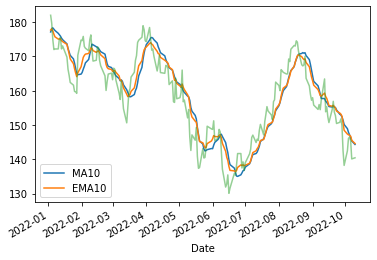

In [47]:
fig, ax = plt.subplots()
data[["MA10", "EMA10"]].loc["2022-01-01":].plot(ax=ax)
data["Close"].loc["2022-01-01":].plot(ax=ax, alpha=0.5)